x_train:  (60000, 32, 32)
y_train:  (60000,)
x_test:  (10000, 32, 32)
y_test:  (10000,)


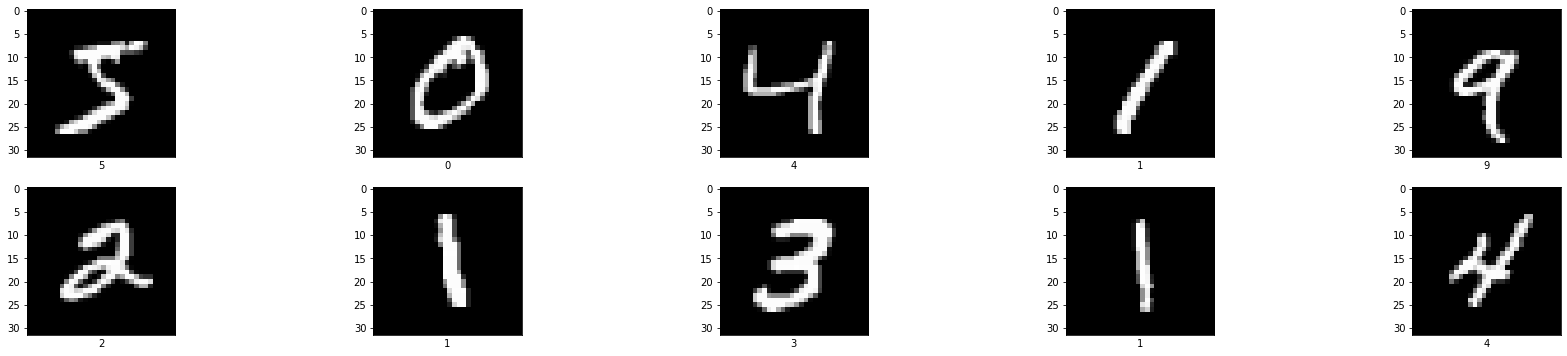

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8dd5bd0ed0>>
Epoch 1/5
1200/1200 [==============================] - 74s 61ms/step - loss: 1.5228 - accuracy: 0.5326
Epoch 2/5
1200/1200 [==============================] - 73s 61ms/step - loss: 0.1802 - accuracy: 0.9445
Epoch 3/5
1200/1200 [==============================] - 73s 61ms/step - loss: 0.1135 - accuracy: 0.9651
Epoch 4/5
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0946 - accuracy: 0.9716
Epoch 5/5
1200/1200 [==============================] - 73s 61ms/step - loss: 0.0765 - accuracy: 0.9760
313/313 - 4s - loss: 0.0650 - accuracy: 0.9787
Testing accuracy:  0.9786999821662903


In [4]:

import tensorflow as tf
import datetime
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
import numpy as np 
import matplotlib.pyplot as plt

#lets consider the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#padding the data inprder to construct images 32 by 32
padd = tf.constant([[0,0], [2,2], [2,2]])
x_train = tf.pad(x_train, padd, constant_values = 0)
x_test = tf.pad(x_test, padd, constant_values = 0)

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)

#Normalizing the pixel intensities
x_train, x_test = x_train[...,np.newaxis]/255, x_test[..., np.newaxis]/255

#plotting the first 10 images 
plt.figure(figsize = (30,6))
for i in range(10):
    plt.subplot(2, 5 , i+1)
    plt.xticks([]); plt.xticks([])
    plt.imshow(tf.reshape(x_train[i], [32,32]), cmap = plt.cm.gray)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#construct the sequential model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

#compiling the model
sgd = SGD(lr = 0.05, decay = 1e-5, momentum = 0.8)
model.compile(optimizer = 'sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary)

#Enable visualization for tensorboard
log_dir = ".\\logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d - %H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Training
model.fit(x_train, y_train, epochs = 5, batch_size = 50, callbacks=[tensorboard_callback])

#evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Testing accuracy: ", test_acc)